In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Gerar dados simulados
# Corrente enquanto carrega: valores entre 300 e 500 mA
# Corrente completamente carregado: valores entre 0 e 50 mA
np.random.seed(42)
corrente_a_carregar = np.random.uniform(300, 500, 500)
corrente_carregado = np.random.uniform(0, 50, 500)
#X_carregando = np.random.uniform([300, 0.5, 1000], [500, 1.5, 2000], (500, 3))  # Exemplo de 3 variáveis
#X_carregado  = np.random.uniform([0, 0.0, 500], [50, 0.5, 1000], (500, 3))

In [4]:
# Etiquetas: 0 para carregando, 1 para carregado
y = np.array([0]*500 + [1]*500)
X = np.concatenate([corrente_a_carregar, corrente_carregado]).reshape(-1, 1)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Precisão no teste: 1.00


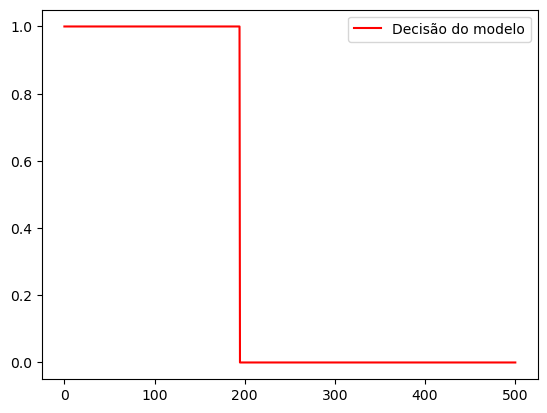

In [5]:
# Criar a rede neural
modelo = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)

# Avaliar o modelo
precisao = modelo.score(X_test, y_test)
print(f"Precisão no teste: {precisao:.2f}")

x_vals = np.linspace(0, 500, 1000).reshape(-1, 1)
x_vals_scaled = scaler.transform(x_vals)
y_pred = modelo.predict(x_vals_scaled)

plt.plot(x_vals, y_pred, color='red', label='Decisão do modelo')
plt.legend()

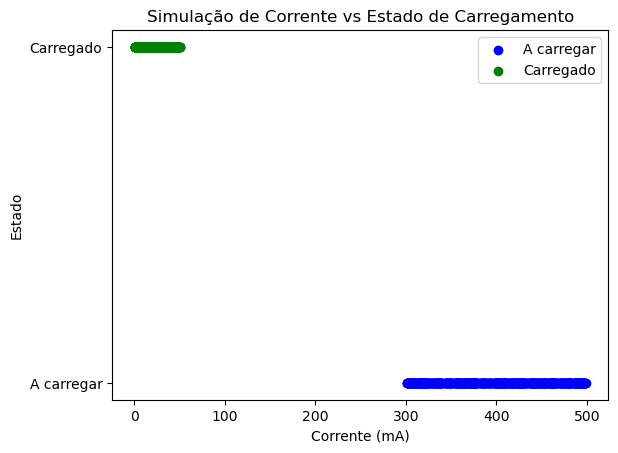

In [7]:
# Visualizar os dados
plt.scatter(corrente_a_carregar, [0]*500, color='blue', label='A carregar')
plt.scatter(corrente_carregado, [1]*500, color='green', label='Carregado')
plt.xlabel('Corrente (mA)')
plt.ylabel('Estado')
plt.yticks([0,1], ['A carregar', 'Carregado'])
plt.legend()
plt.title('Simulação de Corrente vs Estado de Carregamento')
plt.show()

In [9]:
# Exemplo de predição
nova_corrente = np.array([[0], [300]])
nova_corrente_scaled = scaler.transform(nova_corrente)
previsoes = modelo.predict(nova_corrente_scaled)
for c, p in zip(nova_corrente, previsoes):
    estado = 'Carregado' if p == 1 else 'A carregar'
    print(f"Corrente {c[0]:.1f} mA: {estado}")

Corrente 0.0 mA: Carregado
Corrente 300.0 mA: A carregar
